<a href="https://colab.research.google.com/github/HarishniD/LEARNFLOW/blob/main/Restaurant_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data collection & Analysis

In [9]:
#loading the dataset from csv file
big_mart_data=pd.read_csv('/content/DS task 2.zip')

In [10]:
#first 5 rows of dataframe
big_mart_data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [14]:
#no of datapoints &no of feautures
big_mart_data.shape

(1000, 8)

In [15]:
#getting info about dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


categorical features:
Cuisine_Type

In [16]:
#cheching for missing values
big_mart_data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

Data analysis

In [21]:
#statistical measure about data
big_mart_data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


Numerical Feautures

<Figure size 600x600 with 0 Axes>

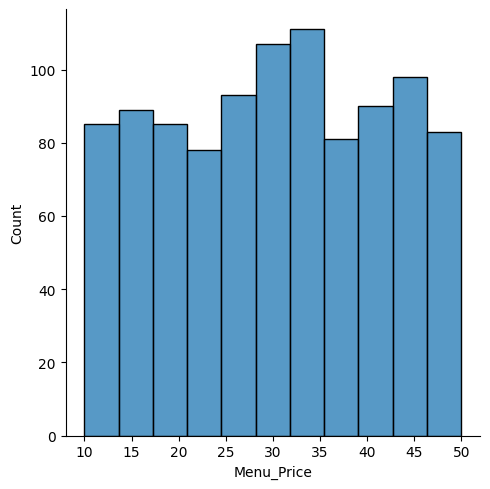

In [24]:

plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Menu_Price'])
plt.show()


<Figure size 600x600 with 0 Axes>

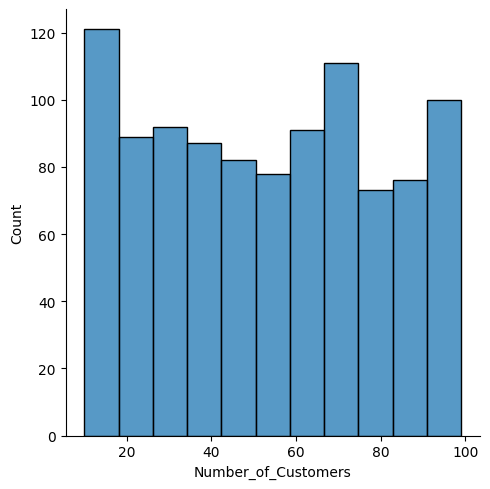

In [28]:
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Number_of_Customers'])
plt.show()


<Figure size 600x600 with 0 Axes>

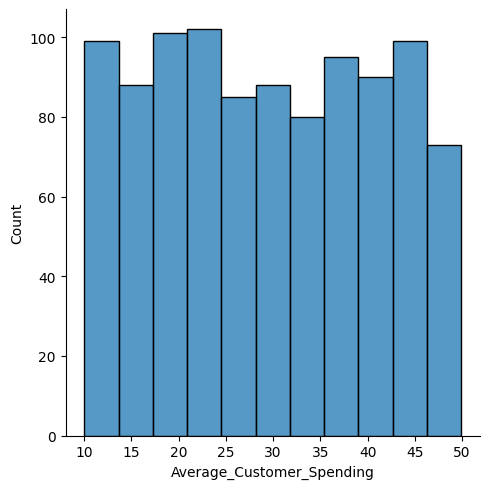

In [31]:

plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Average_Customer_Spending'])
plt.show()


<Figure size 600x600 with 0 Axes>

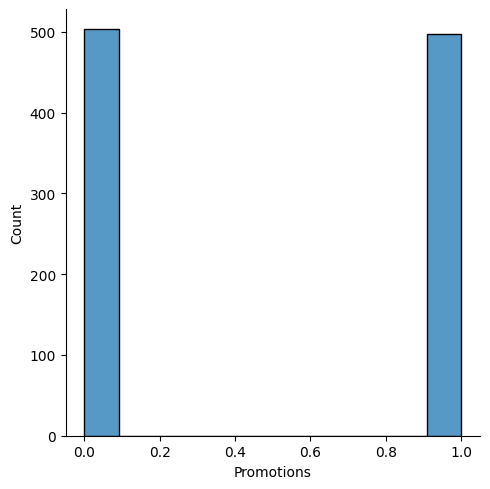

In [32]:
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Promotions'])
plt.show()


<Figure size 600x600 with 0 Axes>

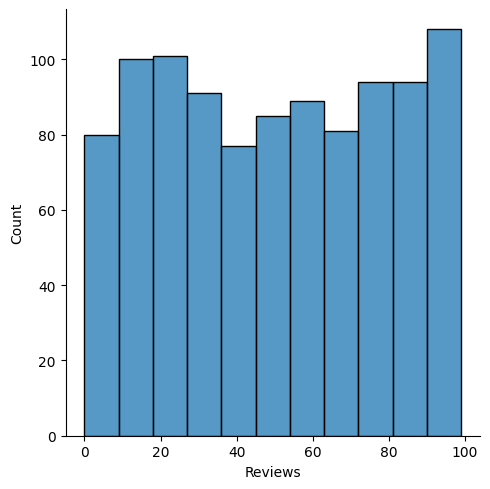

In [33]:
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Reviews'])
plt.show()


<Figure size 600x600 with 0 Axes>

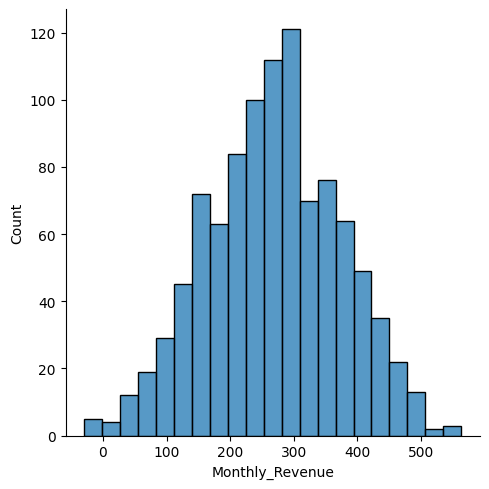

In [34]:
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Monthly_Revenue'])
plt.show()


Categorical features

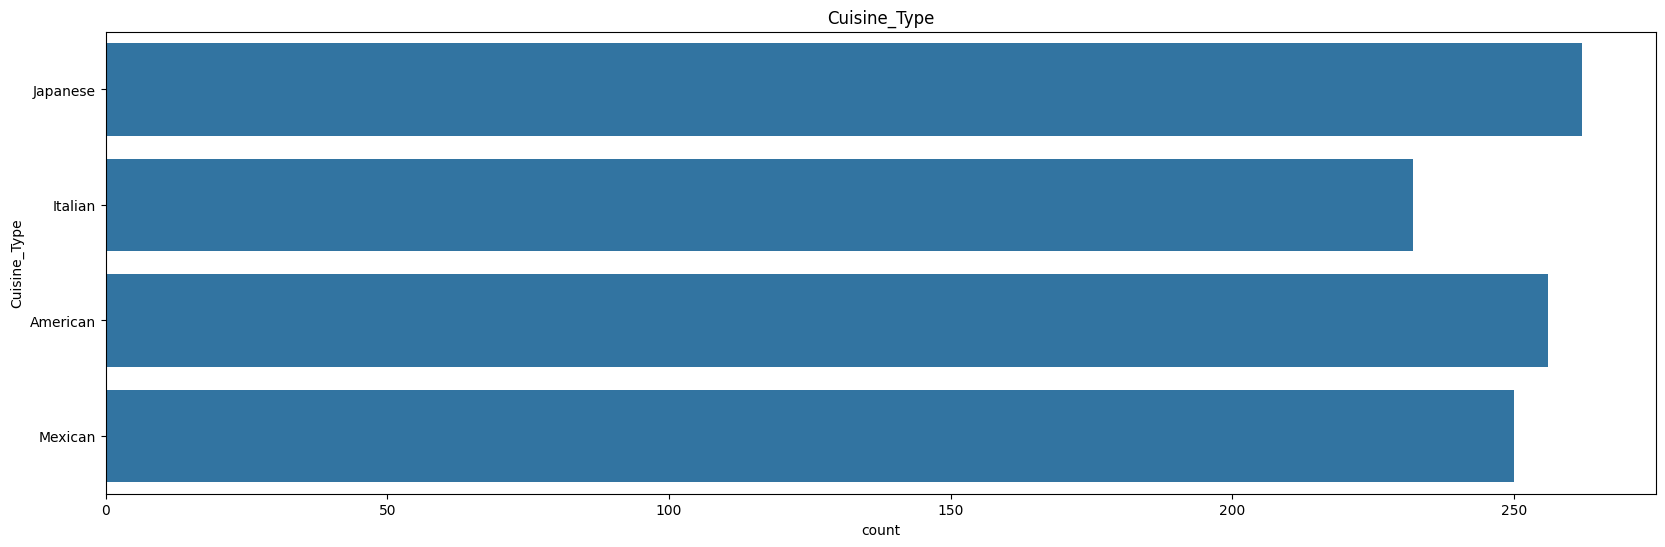

In [41]:
# Remove trailing spaces from column names
big_mart_data.columns = big_mart_data.columns.str.strip()

# Plot the distribution of the 'Cuisine_Type' column
plt.figure(figsize=(20, 6))
sns.countplot(big_mart_data['Cuisine_Type'])
plt.title('Cuisine_Type')
plt.show()


Data preprocessing

In [42]:
big_mart_data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [45]:
print(big_mart_data.columns)

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')


In [47]:
big_mart_data['Cuisine_Type'].value_counts()

Cuisine_Type
Japanese    262
American    256
Mexican     250
Italian     232
Name: count, dtype: int64

In [54]:
big_mart_data.replace({'Cuisine_Type':{'japanese':'Japanese', 'JP':'Japanese','Ame':'American'}},inplace=True)

In [55]:
big_mart_data['Cuisine_Type'].value_counts()

Cuisine_Type
Japanese    262
American    256
Mexican     250
Italian     232
Name: count, dtype: int64

In [56]:
# Filter the DataFrame to include only 'Japanese' and 'American' cuisine types
filtered_data = big_mart_data[big_mart_data['Cuisine_Type'].isin(['Japanese', 'American'])]

# Display the value counts of the filtered 'Cuisine_Type' column
print(filtered_data['Cuisine_Type'].value_counts())


Cuisine_Type
Japanese    262
American    256
Name: count, dtype: int64


LabelEncoding

In [57]:
encoder = LabelEncoder()

In [58]:
big_mart_data['Cuisine_Type'] = encoder.fit_transform(big_mart_data['Cuisine_Type'])

splitting features and targets

In [61]:
x=big_mart_data.drop(columns='Average_Customer_Spending', axis=1)
y=big_mart_data['Reviews']

In [62]:
print(x)

     Number_of_Customers  Menu_Price  Marketing_Spend  Cuisine_Type  \
0                     61   43.117635        12.663793             2   
1                     24   40.020077         4.577892             1   
2                     81   41.981485         4.652911             2   
3                     70   43.005307         4.416053             1   
4                     30   17.456199         3.475052             1   
..                   ...         ...              ...           ...   
995                   73   41.307842        12.122931             2   
996                   31   20.615496         5.822885             3   
997                   69   17.110656         4.141898             2   
998                   73   37.664722         3.046556             2   
999                   81   34.722067        17.989104             1   

     Promotions  Reviews  Monthly_Revenue  
0             0       45       350.912040  
1             0       36       221.319091  
2             1

In [63]:
print(y)

0      45
1      36
2      91
3      59
4      30
       ..
995    40
996    57
997    55
998    23
999    72
Name: Reviews, Length: 1000, dtype: int64


splitting the data into training and testing data

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [66]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 7) (800, 7) (200, 7)


Machine learning model training

XGBoost Regressor

In [67]:
regressor=XGBRegressor()

In [69]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [70]:
#prediction on training data
training_data_prediction = regressor.predict(x_train)

In [71]:
#finding R square value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [73]:
print('R squared value=', r2_train)

R squared value= 0.9999999759067228


In [76]:
#prediction on testing data
testing_data_prediction = regressor.predict(x_test)

In [77]:
r2_test=metrics.r2_score(y_test,testing_data_prediction)

In [78]:
print('R squared value =',r2_test)

R squared value = 0.9999922906585998
